<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Image-Processing-and-Computer-Vision-Python/blob/master/home_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import keras
import matplotlib.pyplot as plt
import cv2

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path='/content/drive/My Drive/homedataset/train'
test_path='/content/drive/My Drive/homedataset/test'

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255 ,horizontal_flip=True,shear_range=0.2 ,zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory('/content/drive/My Drive/homedataset/train',
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

test_set=test_datagen.flow_from_directory('/content/drive/My Drive/homedataset/test',
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

Found 90 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


In [30]:
validation_datagen=ImageDataGenerator(rescale=(1./255))
validation_set=validation_datagen.flow_from_directory('/content/drive/My Drive/homedataset/validation',
                                               target_size=(500,500),
                                               batch_size=32,class_mode='categorical')

Found 18 images belonging to 9 classes.


In [11]:
import os
import numpy as np
import tensorflow as tf


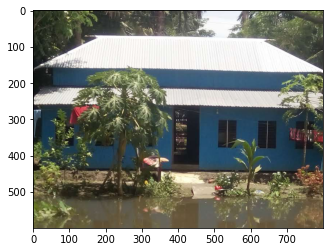

In [17]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/My Drive/homedataset/train/home1/IMG_20200809_110313.jpg')
plt.imshow(img)

In [19]:
cv2.imread('/content/drive/My Drive/homedataset/train/home1/IMG_20200809_110313.jpg')

array([[[ 24,  40,  33],
        [ 25,  41,  34],
        [ 26,  42,  35],
        ...,
        [ 78, 120, 113],
        [ 69, 110, 103],
        [ 54,  95,  88]],

       [[ 24,  40,  33],
        [ 25,  41,  34],
        [ 26,  42,  35],
        ...,
        [ 69, 111, 104],
        [ 71, 112, 105],
        [ 69, 110, 103]],

       [[ 24,  40,  33],
        [ 25,  41,  34],
        [ 26,  42,  35],
        ...,
        [ 69, 110, 103],
        [ 66, 107, 100],
        [ 64, 105,  98]],

       ...,

       [[ 55, 100, 103],
        [ 55, 100, 103],
        [ 55, 100, 103],
        ...,
        [ 62,  89, 109],
        [ 63,  90, 110],
        [ 64,  91, 111]],

       [[ 55, 100, 103],
        [ 55, 100, 103],
        [ 55, 100, 103],
        ...,
        [ 62,  89, 109],
        [ 63,  90, 110],
        [ 64,  91, 111]],

       [[ 55, 100, 103],
        [ 55, 100, 103],
        [ 55, 100, 103],
        ...,
        [ 62,  89, 109],
        [ 63,  90, 110],
        [ 64,  91, 111]]

In [20]:
training_set.class_indices

{'home1': 0,
 'home2': 1,
 'home3': 2,
 'home4': 3,
 'home5': 4,
 'home6': 5,
 'home7': 6,
 'home8': 7,
 'home9': 8}

In [21]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int32)

In [23]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(500,500,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='softmax'))




In [27]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [31]:
hist=model.fit(training_set,epochs=10,steps_per_epoch=3,validation_data=validation_set)

Epoch 1/10
3/3 [==============================] - 33s 11s/step - loss: 57.5470 - accuracy: 0.8247 - val_loss: 16.5846 - val_accuracy: 0.8025
Epoch 2/10
3/3 [==============================] - 18s 6s/step - loss: 7.2522 - accuracy: 0.8296 - val_loss: 2.5441 - val_accuracy: 0.8889
Epoch 3/10
3/3 [==============================] - 17s 6s/step - loss: 2.3609 - accuracy: 0.8889 - val_loss: 2.1648 - val_accuracy: 0.8889
Epoch 4/10
3/3 [==============================] - 18s 6s/step - loss: 2.1946 - accuracy: 0.8889 - val_loss: 2.5918 - val_accuracy: 0.8889
Epoch 5/10
3/3 [==============================] - 17s 6s/step - loss: 2.4336 - accuracy: 0.8889 - val_loss: 2.1311 - val_accuracy: 0.8889
Epoch 6/10
3/3 [==============================] - 17s 6s/step - loss: 2.1840 - accuracy: 0.8889 - val_loss: 2.0743 - val_accuracy: 0.8889
Epoch 7/10
3/3 [==============================] - 17s 6s/step - loss: 2.0670 - accuracy: 0.8889 - val_loss: 1.8195 - val_accuracy: 0.8889
Epoch 8/10
3/3 [===============

IMG_20200809_111052.jpg


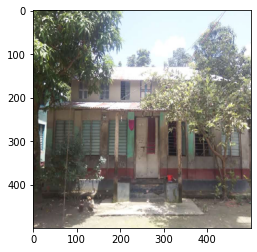

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]
IMG_20200809_111057.jpg


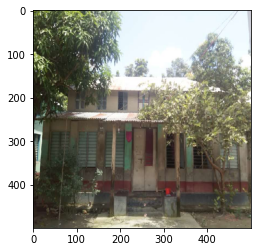

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6331741e-28 0.0000000e+00]]


In [42]:
dir_path='/content/drive/My Drive/homedataset/test/home5'
for i in os.listdir(dir_path):
  print(i)
  img=image.load_img(dir_path+'/'+i ,target_size=(500,500))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  print(val)
